In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from astropy.table import Table
import numpy as np
import seaborn as sns

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 150
plt.rc('text',usetex=True)

In [3]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 150
plt.rc('text',usetex=True)

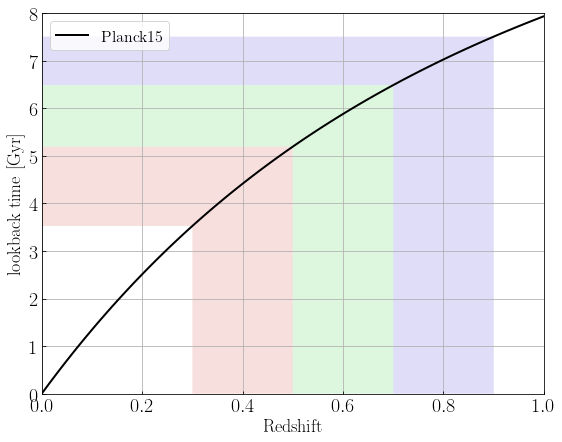

In [4]:
sns.set_palette(sns.color_palette("hls", 3))
from astropy.cosmology import Planck15, WMAP9


def get_lb_time(z1,z2):
    t = []
    for z in np.linspace(z1,z2,100):
        t.append(Planck15.lookback_time(z).value)
    return t

fig = plt.figure(figsize=(9,7))   


plt.plot(np.linspace(0,1,100),get_lb_time(0,1), label='Planck15',color='k',linewidth=2)
plt.fill_between(np.linspace(0.3,0.5,100),get_lb_time(0.3,0.5),alpha=0.2)
plt.fill_between(np.linspace(0.5,0.7,100),get_lb_time(0.5,0.7),alpha=0.2)
plt.fill_between(np.linspace(0.7,0.9,100),get_lb_time(0.7,0.9),alpha=0.2)

plt.fill_betweenx(get_lb_time(0.3,0.5),np.linspace(0.3,0.5,100),alpha=0.2)
plt.fill_betweenx(get_lb_time(0.5,0.7),np.linspace(0.5,0.7,100),alpha=0.2)
plt.fill_betweenx(get_lb_time(0.7,0.9),np.linspace(0.7,0.9,100),alpha=0.2)

plt.xlabel('Redshift',fontsize=18)
plt.ylabel('lookback time [Gyr]',fontsize=18)
plt.legend(fontsize=16)
plt.grid()
plt.xlim([0,1])
plt.ylim([0,8])
plt.savefig('figures/time_z.png',dpi=150)
plt.show()

## Evolution of conformity

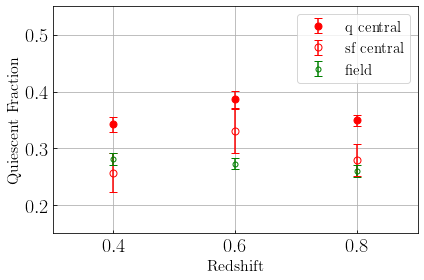

In [5]:
fig = plt.figure(figsize=(6,4))    
plt.errorbar(0.4,0.342,0.013,fmt='or',capsize=4,label='q central',ms=7)
plt.errorbar(0.6,0.386,0.015,fmt='or',capsize=4,ms=7)
plt.errorbar(0.8,0.349,0.009,fmt='or',capsize=4,ms=7)

plt.errorbar(0.4,0.257,0.034,fmt='or',capsize=4,label='sf central',mfc='none',ms=7)
plt.errorbar(0.6,0.33,0.039,fmt='or',capsize=4,mfc='none',ms=7)
plt.errorbar(0.8,0.28,0.028,fmt='or',capsize=4,mfc='none',ms=7)

plt.errorbar(0.4,0.281,0.01,fmt='og',capsize=4,label='field',mfc='none',ms=5)
plt.errorbar(0.6,0.273,0.01,fmt='og',capsize=4,mfc='none',ms=5)
plt.errorbar(0.8,0.260,0.01,fmt='og',capsize=4,mfc='none',ms=5)

plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Quiescent Fraction',fontsize=16)
plt.legend(fontsize=15)
plt.grid()
plt.xlim([0.3,0.9])
plt.ylim([0.15,0.55])
plt.tight_layout()
plt.savefig('figures/conformity_z.png',dpi=150)
plt.show()

## Number Counts

In [6]:
def combine_deep_counts(z, path='CUT_deep_catalogs/number_counts/'):
    affix = '_' + str(round(z, 1))+'.txt'
    cosmos_deep = np.genfromtxt(path+'number_COSMOS_deep'+affix)
    sxds_uddd = np.genfromtxt(path+'number_SXDS_uddd'+affix)
    elais_deep = np.genfromtxt(path+'number_ELAIS_deep'+affix)
    xmmlss_deep = np.genfromtxt(path+'number_XMM-LSS_deep'+affix)
    deep_deep = np.genfromtxt(path+'number_DEEP_deep'+affix)
    
    n_cosmos = int(cosmos_deep[0])
    n_sxds = int(sxds_uddd[0])
    n_elais = int(elais_deep[0])
    n_xmmlss = int(xmmlss_deep[0])
    n_deep = int(deep_deep[0])
    n_combine = [n_cosmos, n_sxds, n_elais, n_xmmlss, n_deep]
    
    n_cosmos_sf = int(cosmos_deep[1])
    n_sxds_sf = int(sxds_uddd[1])
    n_elais_sf = int(elais_deep[1])
    n_xmmlss_sf = int(xmmlss_deep[1])
    n_deep_sf = int(deep_deep[1])
    n_combine_sf = [n_cosmos_sf, n_sxds_sf, n_elais_sf, n_xmmlss_sf, n_deep_sf]
    
    n_cosmos_q = int(cosmos_deep[2])
    n_sxds_q = int(sxds_uddd[2])
    n_elais_q = int(elais_deep[2])
    n_xmmlss_q = int(xmmlss_deep[2])
    n_deep_q = int(deep_deep[2])
    n_combine_q = [n_cosmos_q, n_sxds_q, n_elais_q, n_xmmlss_q, n_deep_q]
    
    n_sat_combine = [cosmos_deep[3],sxds_uddd[3],elais_deep[3],xmmlss_deep[3],deep_deep[3]]
    n_sat_combine_sf = [cosmos_deep[4],sxds_uddd[4],elais_deep[4],xmmlss_deep[4],deep_deep[4]]
    n_sat_combine_q = [cosmos_deep[5],sxds_uddd[5],elais_deep[5],xmmlss_deep[5],deep_deep[5]]

    n_sat_ave = np.average(n_sat_combine, weights=n_combine)
    n_sat_sf_ave = np.average(n_sat_combine_sf, weights=n_combine_sf)
    n_sat_q_ave = np.average(n_sat_combine_q, weights=n_combine_q)
    
    return int(sum(n_combine)), int(sum(n_combine_sf)), int(sum(n_combine_q)), n_sat_ave, n_sat_sf_ave, n_sat_q_ave

In [7]:
for z in [0.2, 0.4, 0.6, 0.8]:
    counts = combine_deep_counts(z)
    print(counts)

(67, 49, 18, 4.975677841426349, 3.0363076446555515, 1.213282368580435)
(1216, 207, 998, 12.981668841225394, 28.14821888437335, 9.705961776355894)
(1557, 158, 1391, 10.041976063634522, 28.460908646149125, 7.672481737105668)
(2747, 271, 2468, 16.794994748226284, 68.54774018782685, 16.006659916283333)


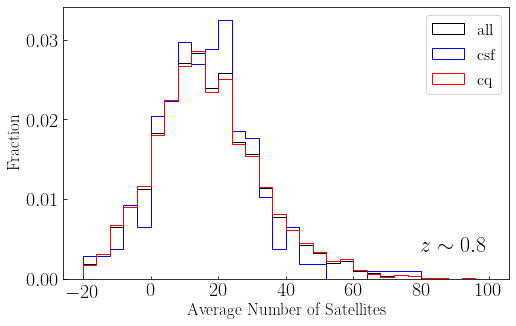

In [8]:
z = 0.8
path = 'CUT_deep_catalogs/number_counts/'
all_n_sat = np.array([])
csf_n_sat = np.array([])
cq_n_sat = np.array([])
for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
    all_n_sat = np.append(all_n_sat,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z)+'.txt'))
    csf_n_sat = np.append(csf_n_sat,np.genfromtxt(path+'number_sathist_csf_'+cat_name+'_'+str(z)+'.txt'))
    cq_n_sat = np.append(cq_n_sat,np.genfromtxt(path+'number_sathist_cq_'+cat_name+'_'+str(z)+'.txt'))

fig = plt.figure(figsize=(8,5)) 
plt.hist(all_n_sat,bins=30,range=(-20,100),histtype='step',density=True,label='all',color='k')
plt.hist(csf_n_sat,bins=30,range=(-20,100),histtype='step',density=True,label='csf',color='b')
plt.hist(cq_n_sat,bins=30,range=(-20,100),histtype='step',density=True,label='cq',color='r')
plt.annotate('$z\sim'+str(z)+'$',xy=(0.8,0.1),xycoords='axes fraction',fontsize=22)

plt.legend(fontsize=16)
plt.xlabel('Average Number of Satellites',fontsize=17)
plt.ylabel('Fraction',fontsize=17)
plt.savefig('figures/n_sat_'+str(z)+'.png')
plt.show()

## field quiescent fraction

In [9]:
cat = Table.read('CUT_deep_catalogs/CUT3_COSMOS_deep.fits')

z=0.6
cat_z_slice = cat[abs(cat['zKDEPeak']-0.6)>0.1]
cat_mass_slice = cat_z_slice[cat_z_slice['MASS_MED']>9.5]

n_sf = np.sum(cat_mass_slice['sfProb'])
n_q = np.sum(1-cat_mass_slice['sfProb'])

print(n_q/(n_sf+n_q))

0.26959990894374214


## Mass vs. Redshift

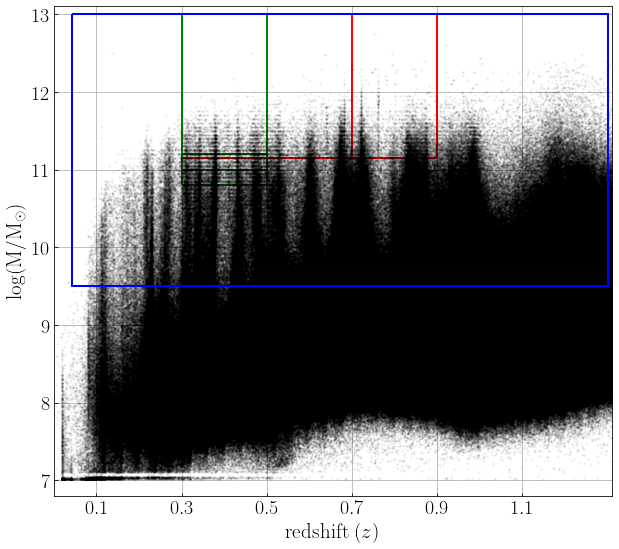

In [74]:
fig = plt.figure(figsize=(10,9))
for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
    cat = Table.read('CUT_deep_catalogs/UV_CUT_CLAUDS_HSC_S16A_' + cat_name + '.fits')
#     cat_gal_deep = cat[np.logical_and(cat['preds_median'] < 0.89, cat['inside'] == True)]
    cat_gal_deep = cat[cat['CLASS']<10]
    plt.plot(cat_gal_deep['Z_BEST_BC03'],cat_gal_deep['MASS_MED'],'.k',markersize=3, alpha=0.05)

# for z in [0.4,0.6,0.8]:
#     cat_central = Table.read('CUT_deep_catalogs/central_sample_total_'+str(z)+'.fits')
#     plt.plot(cat_central['zKDEPeak'],cat_central['MASS_MED'],'.b',markersize=1, alpha=0.1)

# centrals selection boxes
rect1 = patches.Rectangle((0.3,11.15),0.2,1.84,linewidth=3, edgecolor='r',facecolor='none')
plt.vlines(x=0.3,ymin=11.15,ymax=13,linewidth=2, color='r')
plt.vlines(x=0.5,ymin=11.15,ymax=13,linewidth=2, color='r')
plt.vlines(x=0.7,ymin=11.15,ymax=13,linewidth=2, color='r')
plt.vlines(x=0.9,ymin=11.15,ymax=13,linewidth=2, color='r')
plt.hlines(y=11.15,xmin=0.3,xmax=0.9,linewidth=2, color='r')
plt.hlines(y=13.0,xmin=0.3,xmax=0.9,linewidth=2, color='r')

#alternative central selection box
plt.vlines(x=0.3,ymin=10.8,ymax=13,linewidth=2, color='g')
plt.vlines(x=0.5,ymin=10.8,ymax=13,linewidth=2, color='g')
plt.hlines(y=10.8,xmin=0.3,xmax=0.5,linewidth=2, color='g')
plt.hlines(y=11.0,xmin=0.3,xmax=0.5,linewidth=2, color='g')
plt.hlines(y=11.2,xmin=0.3,xmax=0.5,linewidth=2, color='g')
plt.hlines(y=13.0,xmin=0.3,xmax=0.5,linewidth=2, color='g')

# satellite selection box
plt.vlines(x=0.0426,ymin=9.5,ymax=13,linewidth=2, color='b')
plt.axvline(x=1.3,ymin=0.428,ymax=0.985,linewidth=2, color='b')
plt.axhline(y=9.5,xmin=0.0319,xmax=0.993,linewidth=2, color='b')
plt.hlines(y=13.0,xmin=0.0426,xmax=1.3,linewidth=2, color='b')

plt.ylim([6.8,13.1])
plt.xlim([0,1.31])

ax = plt.gca()
ax.set_xticks([0.1,0.3,0.5,0.7,0.9,1.1])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())


plt.xlabel('redshift ($z$)', fontsize=21)
plt.ylabel('log(M/M$_\odot$)', fontsize=21)
plt.grid(True)
plt.savefig('figures/mass_redshift_deep.png',dpi=300)
plt.show()

## Central Galaxy Mass Growth

In [10]:
def merge_est_km(r, m_cen, z):
    r = r/1000. # in Mpc
    if r < 0.03:
        t0 = 2806
        f1 = -94.7 * 1e-5
        f2 = 671 * 1e-5
    elif r < 0.05:
        t0 = 4971
        f1 = -38.6 * 1e-5
        f2 = 615 * 1e-5
    else:
        t0 = 11412
        f1 = 18 * 1e-5
        f2 = 491 * 1e-5

    t_merge = (t0**(-0.5)+f1*z+f2*(m_cen-10))**(-2)

    return t_merge

def merge_est_k(r, m_cen, z):
    m = 10 ** (m_cen - 10)
    h = 0.7
    t_merge = 3.2*(r/50.) * (m/4*h)**(-0.3) * (1+z/20.)  # Gyr

    return np.array(t_merge)

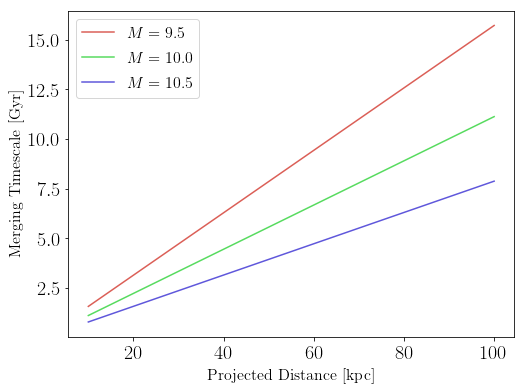

In [26]:
m_cen = 11.2
r_range = np.linspace(10,100,200)
t_merge_range4 = []
t_merge_range6 = []
t_merge_range8 = []
for r in r_range:
    t_merge_range4.append(merge_est_k(r, 9.5, 0.6))
    t_merge_range6.append(merge_est_k(r, 10.0, 0.6))
    t_merge_range8.append(merge_est_k(r, 10.5, 0.6))

fig = plt.figure(figsize=(8,6))
plt.plot(r_range,t_merge_range4,label='$M=9.5$')
plt.plot(r_range,t_merge_range6,label='$M=10.0$')
plt.plot(r_range,t_merge_range8,label='$M=10.5$')
# plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel('Projected Distance [kpc]',fontsize=16)
plt.ylabel('Merging Timescale [Gyr]',fontsize=16)
plt.savefig('figures/merging_time_kw.png')
plt.show()

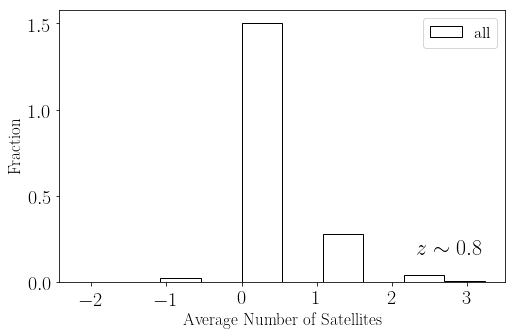

In [23]:
z = 0.8
path = 'CUT_deep_catalogs/number_counts/'
n_sat_merge = np.array([])
for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
    n_sat_merge = np.append(n_sat_merge,np.genfromtxt(path+'number_sathist_merge_'+cat_name+'_'+str(z)+'.txt'))

fig = plt.figure(figsize=(8,5)) 
plt.hist(n_sat_merge,histtype='step',density=True,label='all',color='k')
plt.annotate('$z\sim'+str(z)+'$',xy=(0.8,0.1),xycoords='axes fraction',fontsize=22)

plt.legend(fontsize=16)
plt.xlabel('Average Number of Satellites',fontsize=17)
plt.ylabel('Fraction',fontsize=17)
plt.savefig('figures/n_sat_'+str(z)+'.png')
plt.show()